In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_frame = pd.read_csv('Netflix_shows_movies.csv')

# Check for missing values
missing_values = data_frame.isnull().sum()

# Display the missing values count for each column
print(missing_values)

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64


In [18]:
# I decided on replace missing values with "N/A" because dropping them would affect the general data for analysis
data_frame_cleaned = data_frame.fillna("N/A")

# Basic information about the dataset
data_frame_info = data_frame_cleaned.info()
print(data_frame_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      6234 non-null   object
 4   cast          6234 non-null   object
 5   country       6234 non-null   object
 6   date_added    6234 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6234 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB
None


In [19]:
# Summary statistics for numerical columns
data_summary = data_frame_cleaned.describe()
print(data_summary)

            show_id  release_year
count  6.234000e+03    6234.00000
mean   7.670368e+07    2013.35932
std    1.094296e+07       8.81162
min    2.477470e+05    1925.00000
25%    8.003580e+07    2013.00000
50%    8.016337e+07    2016.00000
75%    8.024489e+07    2018.00000
max    8.123573e+07    2020.00000


In [20]:
# Frequency distribution for genres
genre_distribution = data_frame_cleaned['listed_in'].value_counts()
print(genre_distribution)

listed_in
Documentaries                                          299
Stand-Up Comedy                                        273
Dramas, International Movies                           248
Dramas, Independent Movies, International Movies       186
Comedies, Dramas, International Movies                 174
                                                      ... 
Crime TV Shows, TV Dramas, TV Horror                     1
Classic & Cult TV, Kids' TV, TV Comedies                 1
Romantic TV Shows, TV Action & Adventure, TV Dramas      1
TV Comedies, TV Dramas, TV Horror                        1
Reality TV, Spanish-Language TV Shows                    1
Name: count, Length: 461, dtype: int64


In [21]:
# Frequency distribution for ratings
ratings_distribution = data_frame_cleaned['rating'].value_counts()
print(ratings_distribution)

rating
TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
N/A           10
UR             7
NC-17          2
Name: count, dtype: int64


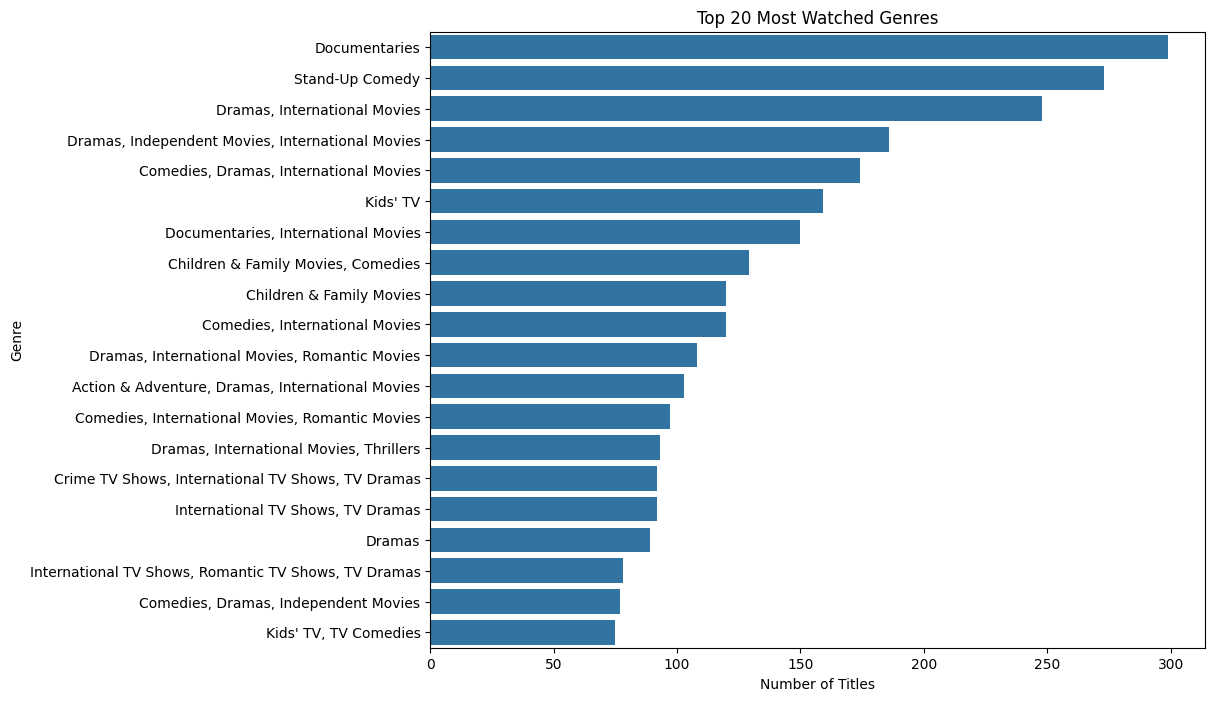

In [22]:
# Get the top 20 genres
top_20_genres = data_frame_cleaned['listed_in'].value_counts().nlargest(20).index

# Countplot for the top 20 most watched genres
plt.figure(figsize=(10, 8))
sns.countplot(data=data_frame_cleaned[data_frame_cleaned['listed_in'].isin(top_20_genres)], y='listed_in', order=top_20_genres)
plt.title('Top 20 Most Watched Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()


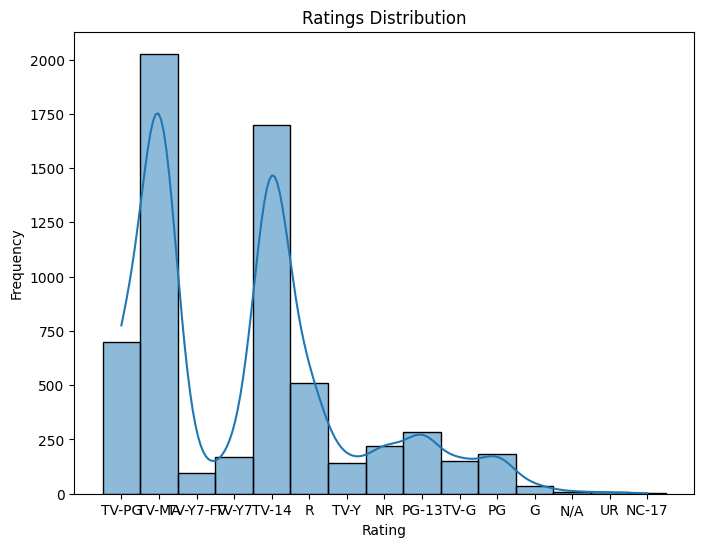

In [23]:
# Histogram for ratings distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=data_frame_cleaned, x='rating', bins=10, kde=True)
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()
